**The Paycheck Protection Program**

**Loan designed to provide a directincentive for small businesses to keep their workers on the payroll duringthe time of COVID-19**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import os
from mpl_toolkits.mplot3d import Axes3D
from google.colab import data_table
data_table.enable_dataframe_formatter()

def nd(arr):
  return np.asarray(arr).reshape(-1)

def yex(ax):
    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
        np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
    ]
    
    # now plot both limits against eachother
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    ax.set_aspect('equal')
    ax.set_xlim(lims)
    ax.set_ylim(lims)
    return ax

fsize=20

plt.rcParams.update({'font.size': fsize})
%config InlineBackend.figure_format = 'retina'

**Compare the data for various states, trends for loan amount above and below $ 150,000, predict behaviours and the list goes on** 

# Load data > $150k 

In [ ]:
df = pd.read_csv("/content/sample_data/public_150k_plus_230101.csv")

In [ ]:
df.head() #top 5 files in dataset

,LoanNumber,DateApproved,SBAOfficeCode,ProcessingMethod,BorrowerName,BorrowerAddress,BorrowerCity,BorrowerState,BorrowerZip,LoanStatusDate,...,BusinessType,OriginatingLenderLocationID,OriginatingLender,OriginatingLenderCity,OriginatingLenderState,Gender,Veteran,NonProfit,ForgivenessAmount,ForgivenessDate
0,9547507704,05/01/2020,464,PPP,"SUMTER COATINGS, INC.",2410 Highway 15 South,Sumter,NaN,29150-9662,12/18/2020,...,Corporation,19248.0,Synovus Bank,COLUMBUS,GA,Unanswered,Unanswered,NaN,773553.37,11/20/2020
1,9777677704,05/01/2020,464,PPP,"PLEASANT PLACES, INC.",7684 Southrail Road,North Charleston,NaN,29420-9000,09/28/2021,...,Sole Proprietorship,19248.0,Synovus Bank,COLUMBUS,GA,Male Owned,Non-Veteran,NaN,746336.24,08/12/2021
2,5791407702,05/01/2020,1013,PPP,BOYER CHILDREN'S CLINIC,1850 BOYER AVE E,SEATTLE,NaN,98112-2922,03/17/2021,...,Non-Profit Organization,9551.0,"Bank of America, National Association",CHARLOTTE,NC,Unanswered,Unanswered,Y,696677.49,02/10/2021
3,6223567700,05/01/2020,920,PPP,KIRTLEY CONSTRUCTION INC,1661 MARTIN RANCH RD,SAN BERNARDINO,NaN,92407-1740,10/16/2021,...,Corporation,9551.0,"Bank of America, National Association",CHARLOTTE,NC,Male Owned,Non-Veteran,NaN,395264.11,09/10/2021
4,9662437702,05/01/2020,101,PPP,AERO BOX LLC,NaN,NaN,NaN,NaN,08/17/2021,...,NaN,57328.0,The Huntington National Bank,COLUMBUS,OH,Unanswered,Unanswered,NaN,370819.35,04/08/2021


# Make `df` more usable

In [ ]:
df.LoanNumber.unique()

array([9547507704, 9777677704, 5791407702, ..., 8039647002, 7209977801,
       5552727707])

In [14]:
loan = {
    "9547507704": {"lower": 9547507703, "upper": 100000000},
    "9777677704": {"lower": 9777677703, "upper": 100000000},
    "5791407702": {"lower": 5791407701, "upper": 100000000},
    "6223567700": {"lower": 6223567699, "upper": 100000000},
    "9662437702" : {"lower": 9662437701, "upper": 100000000}
}

In [15]:
pd.DataFrame(df[df.BusinessType.notna()]["BusinessType"].value_counts())

,BusinessType
Corporation,22401
Limited Liability Company(LLC),14620
Subchapter S Corporation,8625
Non-Profit Organization,3257
Sole Proprietorship,745
Partnership,729
Limited Liability Partnership,561
Professional Association,320
Cooperative,114
501(c)3 â Non Profit,91


In [ ]:
pd.DataFrame(df[df.OriginatingLenderState.notna()]["OriginatingLenderState"].value_counts())# number of state loannumbers for each

,OriginatingLenderState
AL,6244
AR,4613
CA,3502
OH,3335
UT,2111
AK,2098
MS,1988
NC,1863
OK,1772
AZ,1740


In [ ]:
df["date_approved_dt"] = pd.to_datetime(df["DateApproved"]).values

In [ ]:
#correlation of dataset
df.corr()

,LoanNumber,SBAOfficeCode,Term,SBAGuarantyPercentage,InitialApprovalAmount,CurrentApprovalAmount,UndisbursedAmount,ServicingLenderLocationID,JobsReported,NAICSCode,UTILITIES_PROCEED,PAYROLL_PROCEED,MORTGAGE_INTEREST_PROCEED,RENT_PROCEED,REFINANCE_EIDL_PROCEED,HEALTH_CARE_PROCEED,DEBT_INTEREST_PROCEED,OriginatingLenderLocationID,ForgivenessAmount
LoanNumber,1.000000,-0.057398,-0.053415,NaN,0.005415,0.006389,NaN,0.019444,-0.012201,-0.020348,0.014107,0.005606,0.016518,0.072907,0.071410,0.133385,0.089998,0.021830,0.005099
SBAOfficeCode,-0.057398,1.000000,0.056300,NaN,0.147433,0.148100,NaN,-0.140695,0.131715,0.054658,0.021427,0.146759,0.084554,0.083207,-0.015950,0.045454,-0.029637,-0.122928,0.144492
Term,-0.053415,0.056300,1.000000,NaN,-0.098027,-0.098150,NaN,0.062740,-0.096564,0.058520,-0.226370,-0.086899,-0.029778,0.020936,0.014428,0.027791,-0.011327,0.041562,-0.105783
SBAGuarantyPercentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InitialApprovalAmount,0.005415,0.147433,-0.098027,NaN,1.000000,0.992705,NaN,-0.007497,0.808082,-0.042001,0.368874,0.987501,0.543020,0.692592,0.003568,0.714731,0.441160,-0.009250,0.986415
CurrentApprovalAmount,0.006389,0.148100,-0.098150,NaN,0.992705,1.000000,NaN,-0.008630,0.809853,-0.040403,0.370207,0.994691,0.543999,0.692322,0.003385,0.715965,0.441213,-0.010414,0.993560
UndisbursedAmount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ServicingLenderLocationID,0.019444,-0.140695,0.062740,NaN,-0.007497,-0.008630,NaN,1.000000,-0.017068,0.010036,-0.016967,-0.006567,-0.083149,-0.021650,0.103732,-0.033724,0.083287,0.962785,-0.006901
JobsReported,-0.012201,0.131715,-0.096564,NaN,0.808082,0.809853,NaN,-0.017068,1.000000,0.047634,0.315260,0.804711,0.422795,0.531184,0.028322,0.495618,0.373955,-0.018991,0.808708
NAICSCode,-0.020348,0.054658,0.058520,NaN,-0.042001,-0.040403,NaN,0.010036,0.047634,1.000000,-0.012891,-0.042329,-0.055277,0.050331,0.000144,0.015167,-0.006029,0.007076,-0.044931


**• LOAN AMOUNT:**

#1)State Average vs National Average.

In [13]:
import pandas as pd

# Load PPP loan data for a specific state (Alaska state)
state_data = pd.read_csv('/content/sample_data/Ak_data.csv', encoding='unicode_escape')

# Here average loan amount for the state
state_avg_loan_amount = state_data['CurrentApprovalAmount'].mean()
r=str(state_avg_loan_amount)

# Load the national PPP loan data (public_150k_plus_230101.csv)
national_data = pd.read_csv('/content/sample_data/public_150k_plus_230101.csv')

# Here National average loan amount
national_avg_loan_amount = national_data['CurrentApprovalAmount'].mean()

# Print results
print('State average loan amount: $' + str(round(state_avg_loan_amount, 2)))
print('National average loan amount: $' + str(round(national_avg_loan_amount, 2)))


State average loan amount: $558489.97
National average loan amount: $951256.13


#2)Average loan of particular city

In [ ]:

import pandas as pd

state_data = pd.read_csv('/content/sample_data/Ak_data.csv',encoding='latin-1')

# Filter the data to include only loans for a particular city
city_data = state_data[state_data['BorrowerState'] == 'AK']

# Average loan amount for city
average_loan = city_data['ForgivenessAmount'].mean()
print("The average loan amount for AK State is ${:,.2f}".format(average_loan))


The average loan amount for AK State is $485,698.15


#3)Loan Amount grouped by other KPIs like (Business Type), Race,Gender etc.

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 147 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 147 missing from current font.
  font.set_text(s, 0, flags=flags)


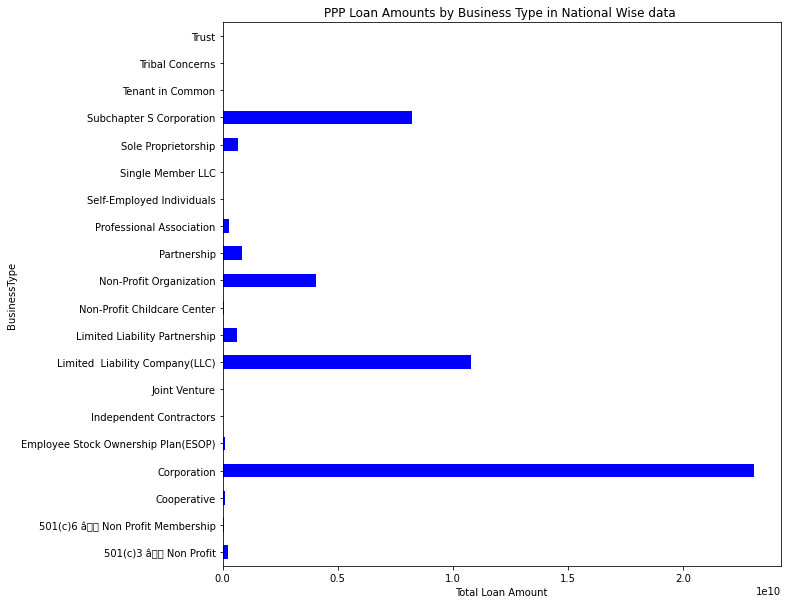

In [18]:
#Business Type
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/sample_data/public_150k_plus_230101.csv',encoding='latin-1')

# Group the data by business type and sum of loan amounts
by_business_type = df.groupby("BusinessType").sum()["CurrentApprovalAmount"]

# Plot the bar graphs
by_business_type.plot(kind="barh", figsize=(10, 10), color="blue")
plt.title("PPP Loan Amounts by Business Type in National Wise data ")
plt.xlabel("Total Loan Amount")
plt.show()


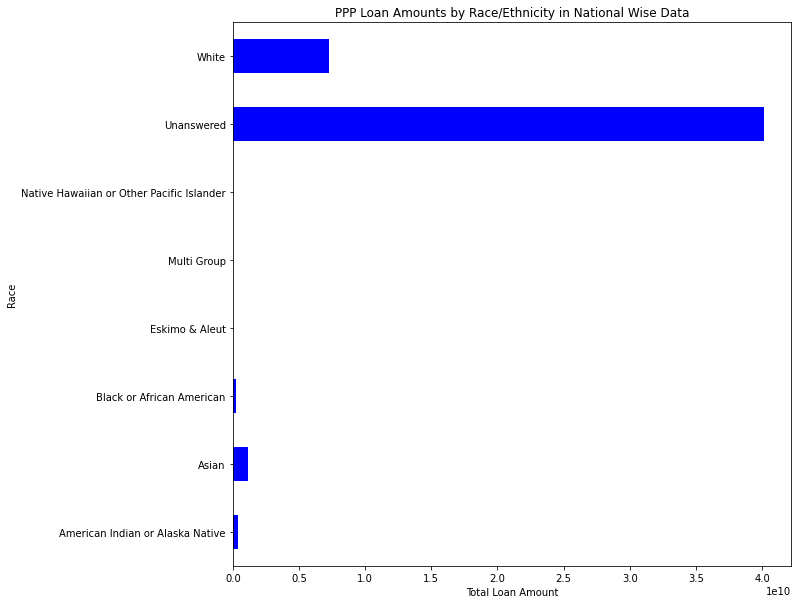

In [ ]:
#Loan Amount grouped by other KPIs like Race?

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/sample_data/public_150k_plus_230101.csv',encoding='latin-1')

# Here Group the data by race and sum the loan amounts
by_race = df.groupby("Race").sum()["CurrentApprovalAmount"]

# Plot the results as horizontal bar chart
by_race.plot(kind="barh", figsize=(10, 10), color="blue")
plt.title("PPP Loan Amounts by Race/Ethnicity in National Wise Data")
plt.xlabel("Total Loan Amount")
plt.show()


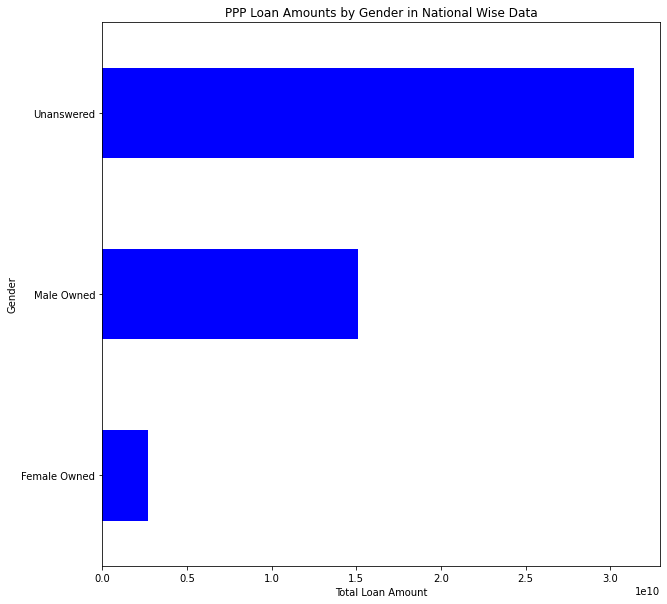

In [ ]:
#Loan Amount grouped by other KPIs like Gender?

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/sample_data/public_150k_plus_230101.csv',encoding='latin-1')

# Group the data by gender and sum the loan amounts
by_gender = df.groupby("Gender").sum()["CurrentApprovalAmount"]

# Plotting the horizontal bar chart here
by_gender.plot(kind="barh", figsize=(10, 10), color="blue")
plt.title("PPP Loan Amounts by Gender in National Wise Data")
plt.xlabel("Total Loan Amount")
plt.show()


#4)Find a linear/non-linear relation between number of jobs reportedand loan amount.

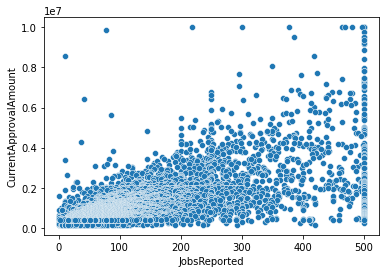

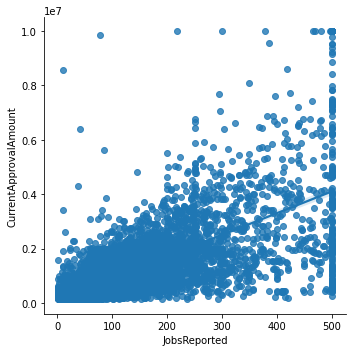

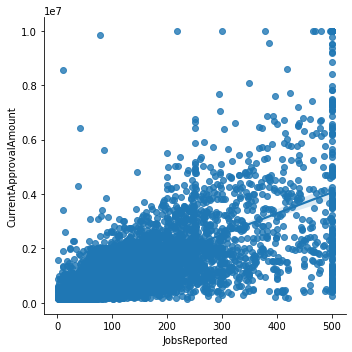

In [ ]:
import pandas as pd
import seaborn as sns

df = pd.read_csv('/content/sample_data/public_150k_plus_230101.csv',encoding='latin-1')

# visualize relationship between two variables using scatterplots
sns.scatterplot(data=df, x='JobsReported', y='CurrentApprovalAmount')

# fit linear regression model to the data Here
sns.lmplot(data=df, x='JobsReported', y='CurrentApprovalAmount')

# fit a non-linear regression model to the data (in this case, a quadratic polynomial)
sns.lmplot(data=df, x='JobsReported', y='CurrentApprovalAmount', order=2)


#5)Amount of loan given by each lender etc.

In [ ]:
import pandas as pd

df = pd.read_csv('/content/sample_data/public_150k_plus_230101.csv',encoding='latin-1')
# group the data by lender and calculate the total loan amount
loan_amounts = df.groupby('ServicingLenderName')['CurrentApprovalAmount'].sum()
# print the loan amounts for each lender
print(loan_amounts)


ServicingLenderName
1st Bank Yuma                      2.134950e+07
1st Colonial Community Bank        5.769000e+05
1st Security Bank of Washington    2.673000e+05
1st Source Bank                    9.020900e+06
22nd State Bank                    7.544755e+06
                                       ...     
Woodforest National Bank           2.464100e+06
Woori America Bank                 2.279271e+06
Zions Bank, A Division of          4.922005e+08
b1BANK                             1.105300e+06
immito, LLC                        4.275180e+06
Name: CurrentApprovalAmount, Length: 690, dtype: float64


**• CITY:**

#1)City wise distribution of businesses granted loans.

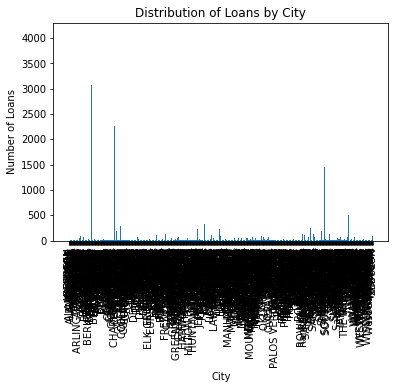

In [ ]:


import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset of loan(public_150k_plus_230101)
loans_df = pd.read_csv('/content/sample_data/public_150k_plus_230101.csv',encoding='latin-1')

# Group the businesses by city and count the number of loans in each city
loans_by_city = loans_df.groupby('ServicingLenderCity')['CurrentApprovalAmount'].count()

# Plotting bar chart here
plt.bar(loans_by_city.index, loans_by_city.values)
plt.xticks(rotation=90)
plt.xlabel('City')
plt.ylabel('Number of Loans')
plt.title('Distribution of Loans by City')
plt.show()


#2)Highest loan lender in each city.

In [7]:
import pandas as pd

data = pd.read_csv('/content/sample_data/public_150k_plus_230101.csv',encoding='latin-1')

# Group the data by city
grouped_data = data.groupby('BorrowerCity')

# Identify the index of the row with the highest loan amount for each city
max_loan_index = grouped_data['CurrentApprovalAmount'].idxmax()

# Use the loc method to access the lender name in the row with highest loan amount for each city
result = data.loc[max_loan_index, ['BorrowerCity', 'BorrowerName']]
print(result)


      BorrowerCity                                       BorrowerName
3902     ABBEVILLE             HENRY COUNTY HEALTHCARE AUTHORITY, INC
38759       ACAMPO                                     KELLEYCORE INC
47083        ACTON                   S.S.P. MEXICAN RESTAURANTS, INC.
7360    ADAMSVILLE                          BIG SKY ENVIRONMENTAL LLC
6608       ADDISON                           ADDISON FABRICATORS, INC
...            ...                                                ...
13463         troy                                         CATHIA,INC
30176       tucson                           PINNACLE CONCESSIONS LLC
43298       tulare                             AGUAYO CONTRACTING INC
36409     woodland  WOODLAND CLINIC MEDICAL GROUP A MEDICAL CORPOR...
29997         yuma                                      SALVADOR RUIZ

[2821 rows x 2 columns]


#3)Compare cities on the basis of loan amounts etc.

In [8]:
import pandas as pd

loans_df = pd.read_csv('/content/sample_data/public_150k_plus_230101.csv',encoding='latin-1') 

# Here Calculate total loan amounts for each city
city_loan_amounts = loans_df.groupby('ServicingLenderCity')['CurrentApprovalAmount'].sum().reset_index()

# Sort cities amount in descending order
sorted_cities = city_loan_amounts.sort_values('CurrentApprovalAmount', ascending=False)

# top 10 cities by loan amount
print(sorted_cities.head(10))


    ServicingLenderCity  CurrentApprovalAmount
357         LOS ANGELES           3.390597e+09
129            COLUMBUS           3.154300e+09
564       SAN FRANCISCO           2.972824e+09
106           CHARLOTTE           2.692785e+09
560      SALT LAKE CITY           1.868246e+09
53           BIRMINGHAM           1.810261e+09
595         SIOUX FALLS           1.620770e+09
692          WILMINGTON           1.303772e+09
498             PHOENIX           1.173976e+09
144              DALLAS           1.065647e+09


**•BUSINESS TYPE:**

#1)Number of jobs reported by different business types

In [9]:
import pandas as pd

# Read the CSV file into a pandas dataframe
df = pd.read_csv('/content/sample_data/public_150k_plus_230101.csv',encoding='latin-1') 

# Group the data by business type and calculate the number of jobs reported
jobs_by_business_type = df.groupby('BusinessType')['JobsReported'].sum()

# Print the results
print(jobs_by_business_type)


BusinessType
501(c)3 â Non Profit                   17606.0
501(c)6 â Non Profit Membership         2836.0
Cooperative                               8597.0
Corporation                            1972478.0
Employee Stock Ownership Plan(ESOP)       6816.0
Independent Contractors                    333.0
Joint Venture                               24.0
Limited  Liability Company(LLC)        1092898.0
Limited Liability Partnership            47657.0
Non-Profit Childcare Center               4820.0
Non-Profit Organization                 404735.0
Partnership                              70872.0
Professional Association                 26161.0
Self-Employed Individuals                 1149.0
Single Member LLC                          443.0
Sole Proprietorship                      61827.0
Subchapter S Corporation                751252.0
Tenant in Common                            89.0
Tribal Concerns                           2071.0
Trust                                     2335.0
Name: J

#2)Compare loan amounts of Male Owned businesses VS FemaleOwned businesses etc.

In [10]:
import pandas as pd
df = pd.read_csv('/content/sample_data/public_150k_plus_230101.csv',encoding='latin-1') 

# Compare Male and Female
male_loans = df[df['Gender'] == 'Male']
female_loans = df[df['Gender'] == 'Female']

# Calculate the total loan amounts by gender
total_male_loans = male_loans['CurrentApprovalAmount'].sum()
total_female_loans = female_loans['CurrentApprovalAmount'].sum()

# Print results
print(f"Total loan amount for male-owned businesses: ${total_male_loans}")
print(f"Total loan amount for female-owned businesses: ${total_female_loans}")


Total loan amount for male-owned businesses: $0.0
Total loan amount for female-owned businesses: $0.0


#3)Average Loan Amount per Business Type.

In [11]:
import pandas as pd

loan_data = pd.read_csv('/content/sample_data/public_150k_plus_230101.csv',encoding='latin-1') 

# Group the data by business type and calculate the average loan amount
avg_loan_amount_by_type = loan_data.groupby('BusinessType')['CurrentApprovalAmount'].mean()

# result here
print(avg_loan_amount_by_type)



BusinessType
501(c)3 â Non Profit                 2.736906e+06
501(c)6 â Non Profit Membership      1.115683e+06
Cooperative                            1.019306e+06
Corporation                            1.031119e+06
Employee Stock Ownership Plan(ESOP)    2.113679e+06
Independent Contractors                4.258086e+05
Joint Venture                          2.484406e+05
Limited  Liability Company(LLC)        7.390396e+05
Limited Liability Partnership          1.084152e+06
Non-Profit Childcare Center            8.797040e+05
Non-Profit Organization                1.239906e+06
Partnership                            1.123919e+06
Professional Association               8.543971e+05
Self-Employed Individuals              6.003190e+05
Single Member LLC                      5.161825e+05
Sole Proprietorship                    8.689322e+05
Subchapter S Corporation               9.553459e+05
Tenant in Common                       4.393500e+05
Tribal Concerns                        9.613555e+05

**• DATE APPROVED:**

#1)Find months in which high amount of loans were sanctioned.

In [ ]:
import pandas as pd
df = pd.read_csv('/content/sample_data/public_150k_plus_230101.csv',encoding='latin-1',engine='python', error_bad_lines=False) 

# Convert dateApproved column to a pandas datetime object
df['DateApproved'] = pd.to_datetime(df['DateApproved'])

# Group the data by month and calculate the total loan amount for each month
monthly_totals = df.groupby(df['DateApproved'].dt.to_period('M')).sum()['CurrentApprovalAmount']

# Identify the months with the highest loan amounts
high_loan_months = monthly_totals[monthly_totals >= monthly_totals.quantile(0.75)].index.tolist()

print('Months with high loan amounts:')
print(high_loan_months)


Months with high loan amounts:
[Period('2020-04', 'M'), Period('2020-05', 'M'), Period('2021-02', 'M')]


#2)Find how many jobs were reported in the past months and predicthow many could be reported in the upcoming months.

In [17]:
import pandas as pd

data = pd.read_csv('/content/sample_data/public_150k_plus_230101.csv',encoding='latin-1')


# Extract the number of jobs reported for the past few months
past_months = data['JobsReported'][-3:]  # Assuming the data is sorted by date

# Calculate the total number of jobs reported in the past months
total_jobs_past_months = past_months.sum()

print(f'Total jobs reported in the past months: {total_jobs_past_months}')


Total jobs reported in the past months: 280.0


#3)Find total number of loans approved in each month and use it forTime Series Forecasting to predict how many loans would beapproved in the upcoming months etc.

In [12]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import datetime as datetime
from prophet import Prophet

# Load the loan approval dataset into a pandas dataframe
df = pd.read_csv('/content/sample_data/public_150k_plus_230101.csv',encoding='latin-1') 

# Convert the date column to a pandas datetime object and set it as the index
df['DateApproved'] = pd.to_datetime(df['DateApproved'])
df.set_index('DateApproved', inplace=True)

# Resample the data at a monthly level and compute the sum of the loan amounts
monthly_loans = df['CurrentApprovalAmount'].resample('M').sum()

# Split the data into training and testing sets
train_size = int(len(monthly_loans) * 0.8)
train, test = monthly_loans[:train_size], monthly_loans[train_size:]

# Train an ARIMA model on the training data and make predictions on the testing data
model = ARIMA(train, order=(1, 1, 1))
model_fit = model.fit()
predictions = model_fit.forecast(len(test))

# Evaluate the performance of the model using MAE and RMSE
mae = mean_absolute_error(test, predictions)
rmse = mean_squared_error(test, predictions, squared=False)

# Train a Prophet model on the entire dataset and make predictions on the future
prophet_model = Prophet()
prophet_df = pd.DataFrame({'ds': monthly_loans.index, 'y': monthly_loans.values})
prophet_model.fit(prophet_df)
future = prophet_model.make_future_dataframe(periods=12, freq='M')
prophet_predictions = prophet_model.predict(future)

# Print the predicted values and evaluation metrics
print(predictions)
print(prophet_predictions.tail(12))
print('ARIMA MAE: %.3f' % mae)
print('ARIMA RMSE: %.3f' % rmse)


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 11.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbsaw79ps/6f7f0uhp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbsaw79ps/esu540tw.json
DEBUG:cmdstanpy:id

2021-04-30    3.262620e+09
2021-05-31    3.472024e+09
2021-06-30    3.529874e+09
Freq: M, Name: predicted_mean, dtype: float64
           ds         trend    yhat_lower    yhat_upper   trend_lower  \
15 2021-07-31 -3.175510e+09 -1.204540e+10  6.064625e+09 -3.175510e+09   
16 2021-08-31 -3.996249e+09 -1.292653e+10  4.850433e+09 -3.996249e+09   
17 2021-09-30 -4.790513e+09 -1.424861e+10  4.394323e+09 -4.790513e+09   
18 2021-10-31 -5.611252e+09 -1.450508e+10  3.282502e+09 -5.611252e+09   
19 2021-11-30 -6.405516e+09 -1.614219e+10  2.834663e+09 -6.405516e+09   
20 2021-12-31 -7.226255e+09 -1.692082e+10  1.828251e+09 -7.226255e+09   
21 2022-01-31 -8.046994e+09 -1.692885e+10  1.318681e+09 -8.046994e+09   
22 2022-02-28 -8.788306e+09 -1.759051e+10 -1.200855e+08 -8.788307e+09   
23 2022-03-31 -9.609045e+09 -1.872494e+10 -4.428029e+08 -9.609046e+09   
24 2022-04-30 -1.040331e+10 -1.913444e+10 -1.116072e+09 -1.040331e+10   
25 2022-05-31 -1.122405e+10 -2.042117e+10 -2.180931e+09 -1.122405e+10 

**To Creative analysis points, and how I can handle a large data-set.**







*   Demographic Analysis
*   Industry Analysis

*   Loan Forgiveness




1)Loan approval rate by business size: One analysis point could to look at the loan approval rate by business size, specifically by number of employees.

> 2)Loan disbursement rate by Lender: Another analysis point could be to look at the loan
disbursement rate by lender. The SBA dataset includes information on the lender that
approved and disbursed each loan. By analyzing this information, we can determine which lenders were most successful in disbursing loans quickly and efficiently.

3)Demographic breakdown of PPP loans: the PPP program was designed to provide finanical assistance to small business that were adversely impacted by th covid 19 pandemic, regardless of demographic factors.

> 4) Loan forgiveness rate by loan amount: In addition to examing th loan forgiveness rate by industry as mentioned earlier, analysis point could to look at loan forgiveness rate bt loan amount

5)Use of PPP funds by industry: The PPP program required business to use funds for specific purposes, such as payroll expenses,rent and utilites.An analuysis point could be look at use of PPP funds by industry.









**Additional information of Data I Observed while doing this project**

In [ ]:
import sys
print(sys.executable)

/usr/bin/python3


In [ ]:
#missing values for each column
how_many = df.isna().sum()
print(how_many, "\n")

LoanNumber                         0
DateApproved                       0
SBAOfficeCode                      0
ProcessingMethod                   1
BorrowerName                       2
BorrowerAddress                    9
BorrowerCity                       9
BorrowerState                     14
BorrowerZip                        9
LoanStatusDate                   304
LoanStatus                         1
Term                               1
SBAGuarantyPercentage              1
InitialApprovalAmount              1
CurrentApprovalAmount              1
UndisbursedAmount                  2
FranchiseName                  13300
ServicingLenderLocationID          1
ServicingLenderName                1
ServicingLenderAddress             1
ServicingLenderCity                1
ServicingLenderState               1
ServicingLenderZip                 1
RuralUrbanIndicator                1
HubzoneIndicator                   1
LMIIndicator                       1
BusinessAgeDescription             1
P

In [ ]:
#What type data is available in my content folder/sample_data/
for dirname, _, filenames in os.walk('/content/sample_data/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/sample_data/README.md
/content/sample_data/anscombe.json
/content/sample_data/Data_150K_More.csv
/content/sample_data/public_150k_plus_230101.csv
/content/sample_data/california_housing_test.csv
/content/sample_data/mnist_test.csv
/content/sample_data/california_housing_train.csv
/content/sample_data/mnist_train_small.csv


In [ ]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [ ]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [ ]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

In [ ]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# PPP_data_150k_plus.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df1 = pd.read_csv('/content/sample_data/public_150k_plus_230101.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'public_150k_plus_230101.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 53 columns


In [ ]:
df1.head(5)

,LoanNumber,DateApproved,SBAOfficeCode,ProcessingMethod,BorrowerName,BorrowerAddress,BorrowerCity,BorrowerState,BorrowerZip,LoanStatusDate,...,BusinessType,OriginatingLenderLocationID,OriginatingLender,OriginatingLenderCity,OriginatingLenderState,Gender,Veteran,NonProfit,ForgivenessAmount,ForgivenessDate
0,9547507704,05/01/2020,464,PPP,"SUMTER COATINGS, INC.",2410 Highway 15 South,Sumter,NaN,29150-9662,12/18/2020,...,Corporation,19248,Synovus Bank,COLUMBUS,GA,Unanswered,Unanswered,NaN,773553.37,11/20/2020
1,9777677704,05/01/2020,464,PPP,"PLEASANT PLACES, INC.",7684 Southrail Road,North Charleston,NaN,29420-9000,09/28/2021,...,Sole Proprietorship,19248,Synovus Bank,COLUMBUS,GA,Male Owned,Non-Veteran,NaN,746336.24,08/12/2021
2,5791407702,05/01/2020,1013,PPP,BOYER CHILDREN'S CLINIC,1850 BOYER AVE E,SEATTLE,NaN,98112-2922,03/17/2021,...,Non-Profit Organization,9551,"Bank of America, National Association",CHARLOTTE,NC,Unanswered,Unanswered,Y,696677.49,02/10/2021
3,6223567700,05/01/2020,920,PPP,KIRTLEY CONSTRUCTION INC,1661 MARTIN RANCH RD,SAN BERNARDINO,NaN,92407-1740,10/16/2021,...,Corporation,9551,"Bank of America, National Association",CHARLOTTE,NC,Male Owned,Non-Veteran,NaN,395264.11,09/10/2021
4,9662437702,05/01/2020,101,PPP,AERO BOX LLC,NaN,NaN,NaN,NaN,08/17/2021,...,NaN,57328,The Huntington National Bank,COLUMBUS,OH,Unanswered,Unanswered,NaN,370819.35,04/08/2021


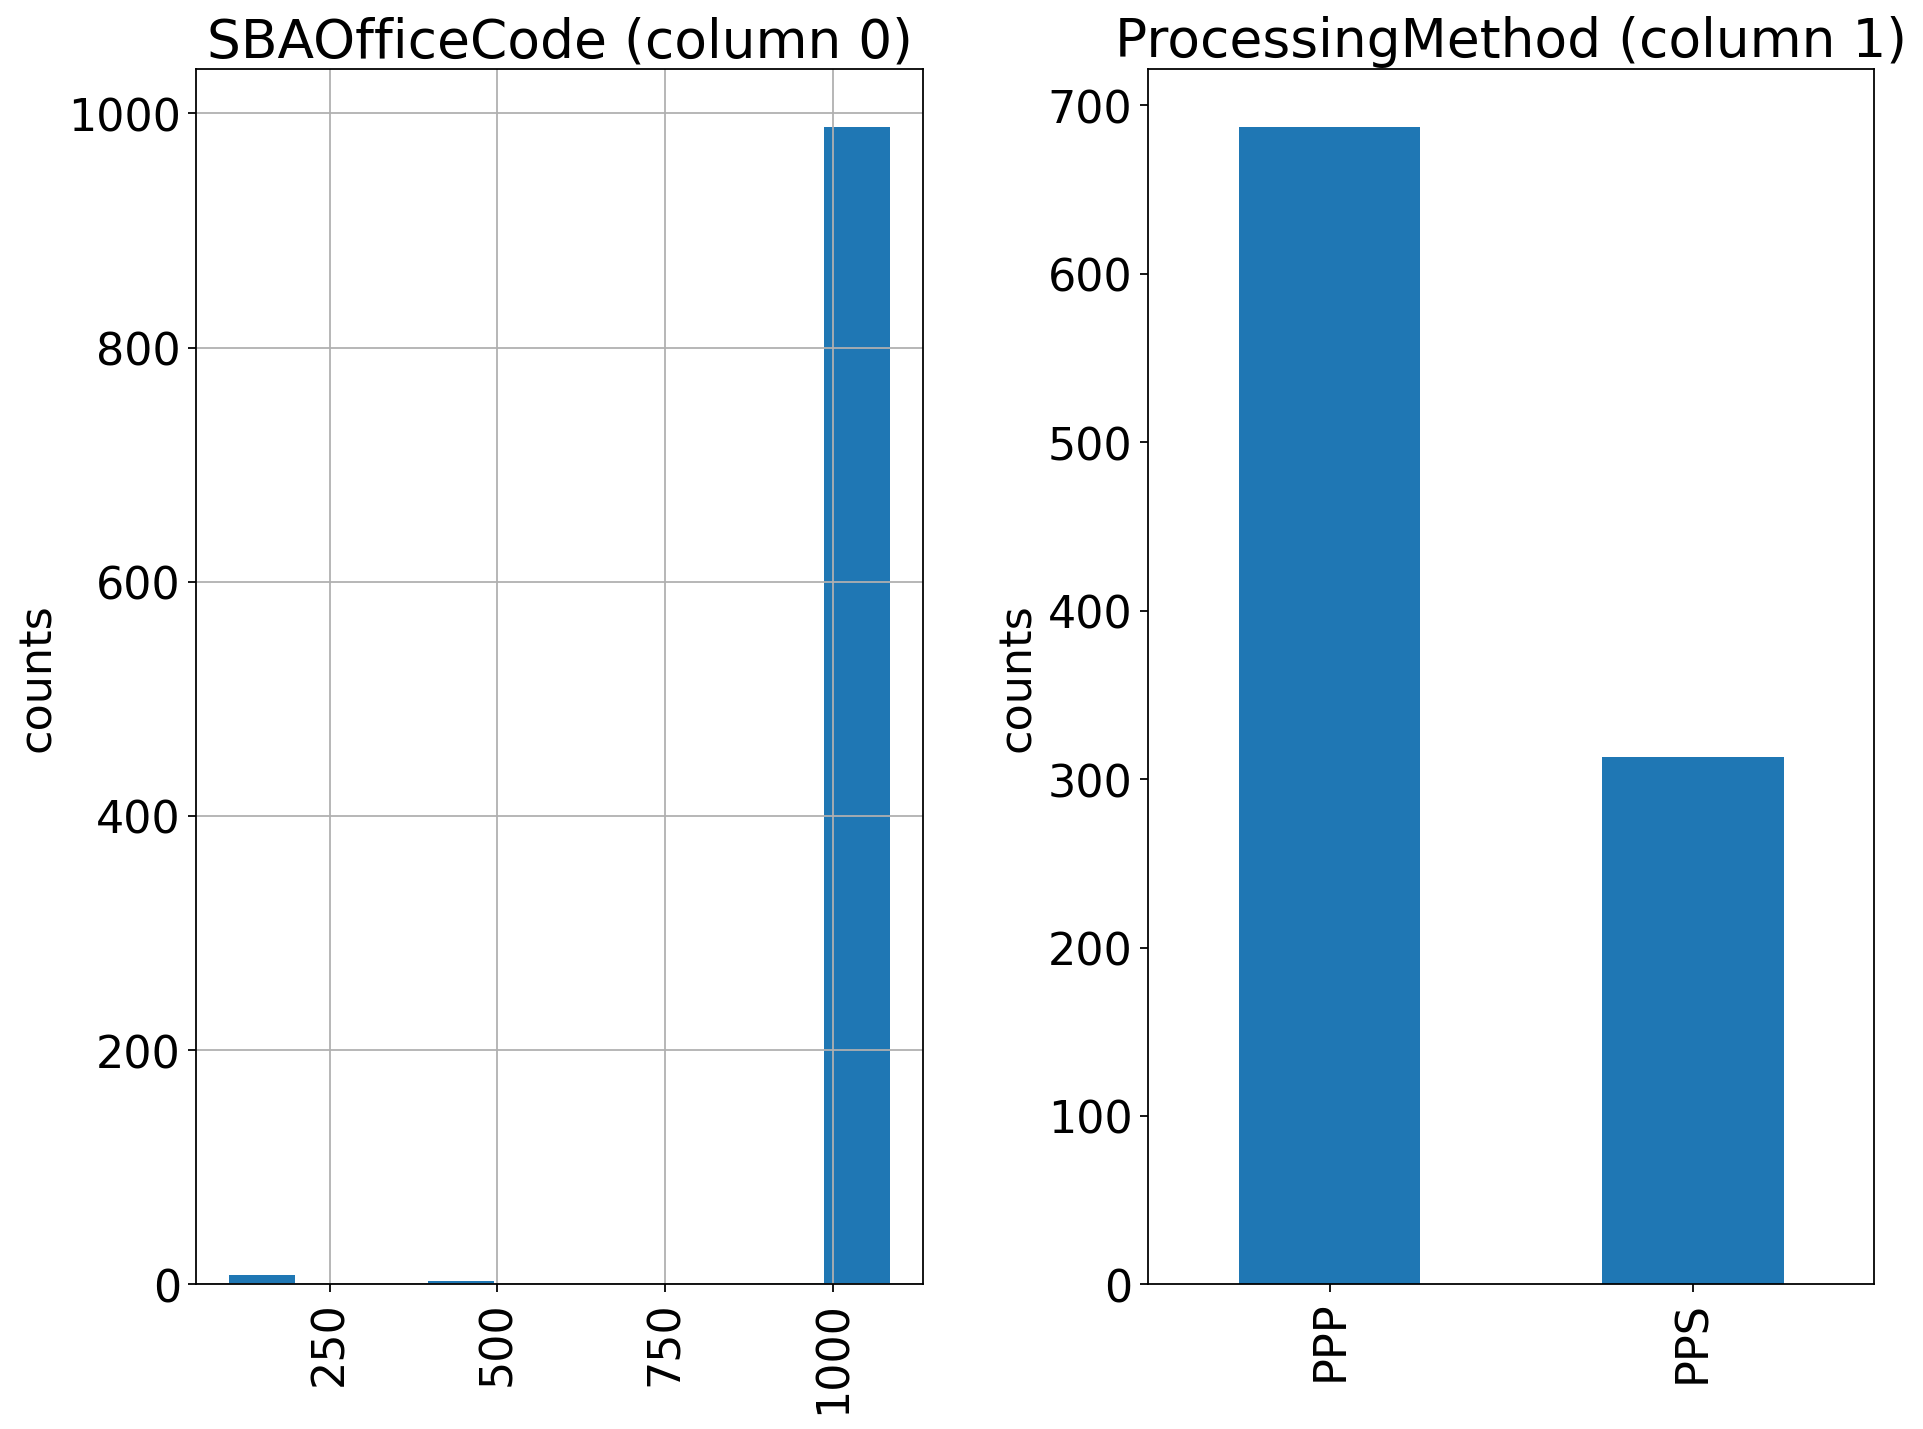

In [ ]:
plotPerColumnDistribution(df1, 2, 5)

<ipython-input-52-a0343c621274>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  df = df.dropna('columns') # drop columns with NaN


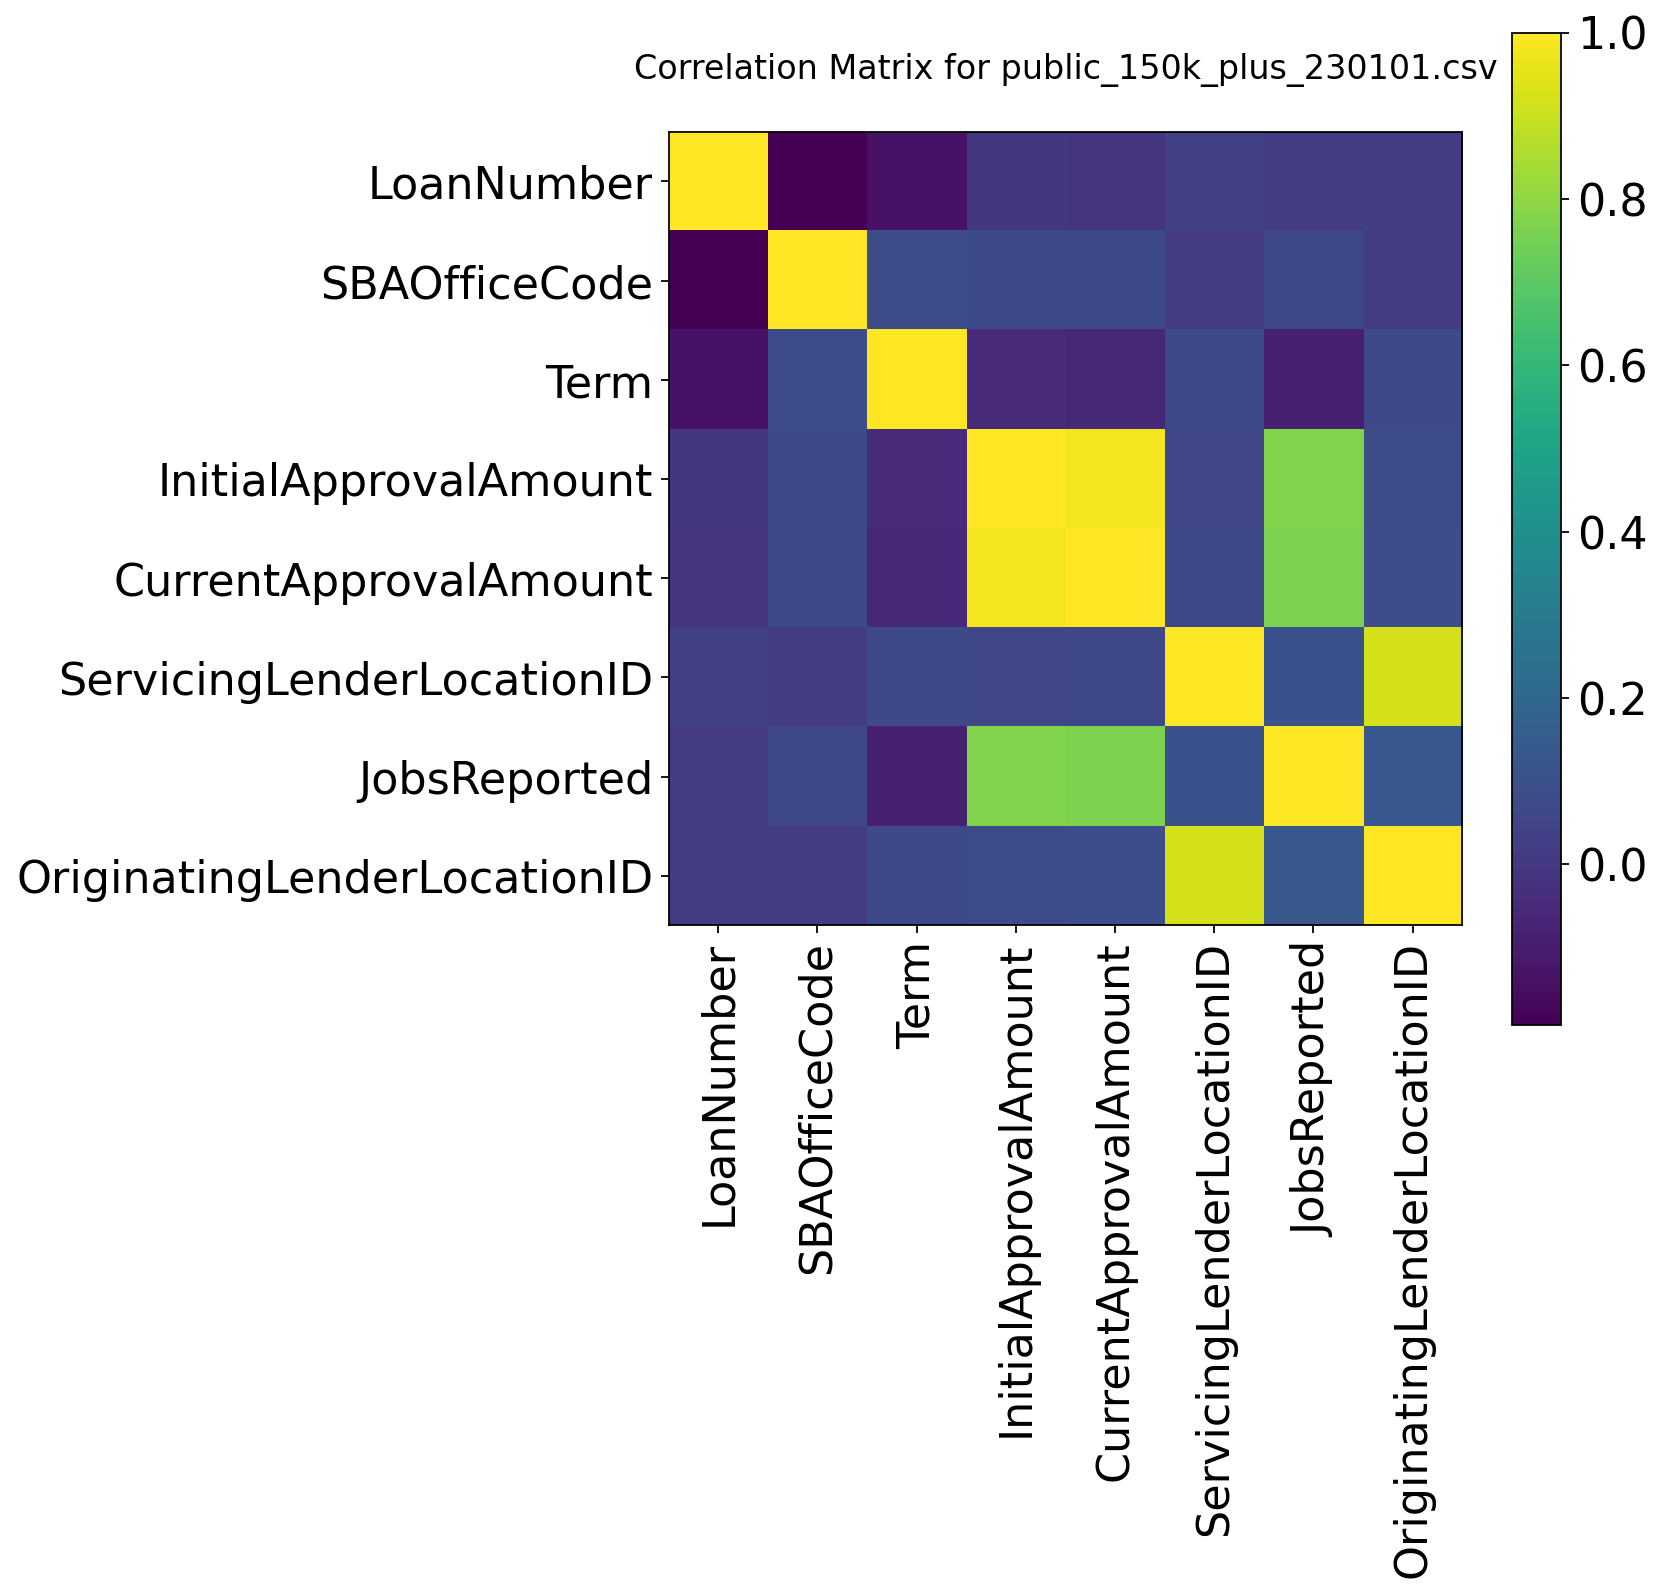

In [ ]:
plotCorrelationMatrix(df1, 8)


<ipython-input-53-45d7bdcfca59>:5: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  df = df.dropna('columns')


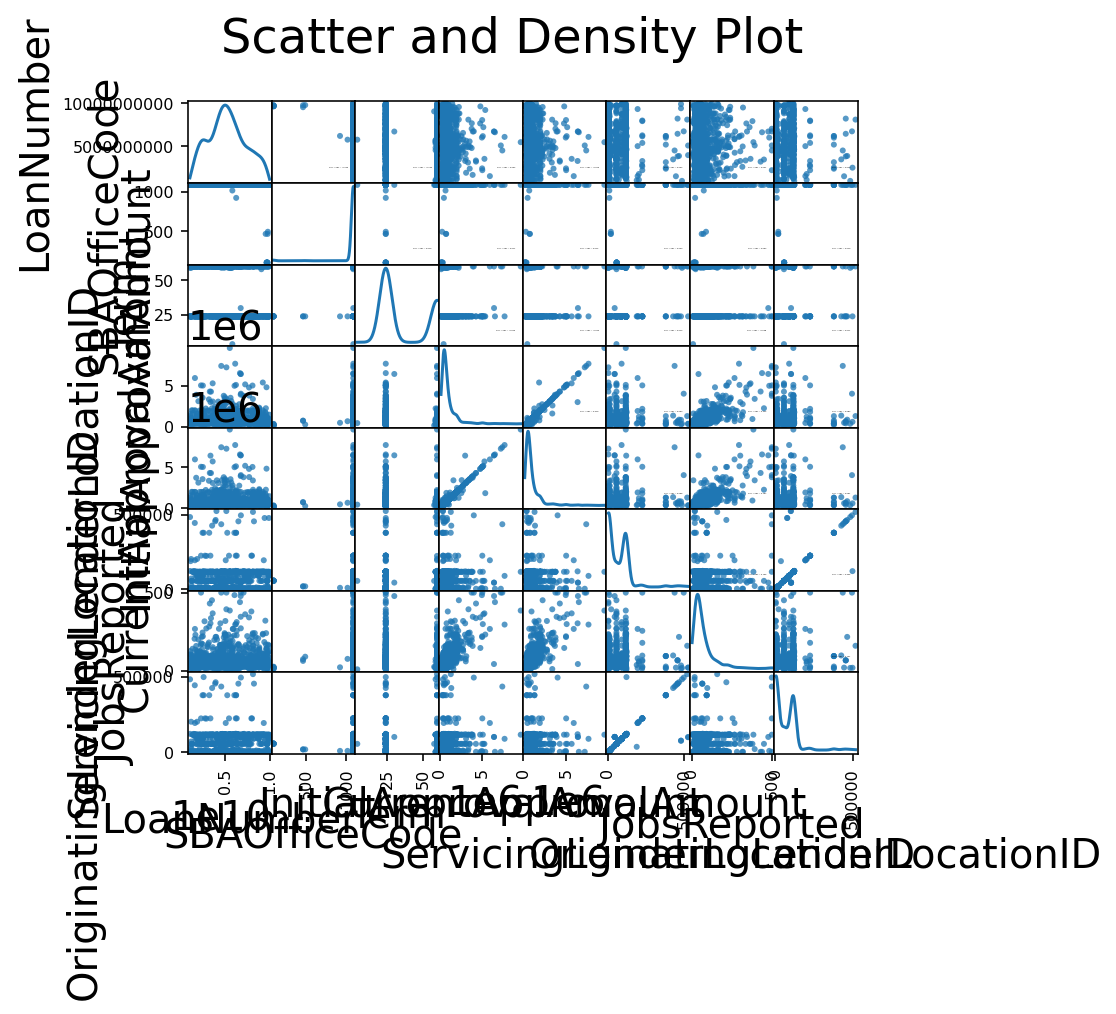

In [ ]:
plotScatterMatrix(df1, 6, 1)#Scatter and density plots:

In [ ]:
#Checking the number of industries in each subcategory for the first graph:.
df1['LoanNumber'].value_counts()

9547507704    1
8183887107    1
5043847100    1
1714377203    1
6586898700    1
             ..
3904287102    1
8750587010    1
5991247010    1
4079198306    1
3933197207    1
Name: LoanNumber, Length: 1000, dtype: int64

In [ ]:

grouped_together = df1['CurrentApprovalAmount'].groupby(df1['Gender']).sum()[:].sort_values(ascending=False).astype(int)
grouped_together
print(grouped_together.sum())

964703546
